# Part 3 Clustering Exercise    

##Topics:


1.   K-Means      
2.   GMMs
3.  Mean Shift      
4.  Affinity Propagation  
5.   Spectral clustering  
 


#Section 0 Warming up

##Setup

In [0]:
"""import common python libraries"""
import cv2
import numpy as np
import random
import pandas as pd
import io
from google.colab import files

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('classic')

# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###Load built-in datasets from [sklearn](http://scikit-learn.org/)   
<!-- *   [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)      -->
*   [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   


** *Args:* **   

*   ** *DATA_FLAG* **:  *flag to toggle datasets, e.g."digits", "iris",  (default: "iris")* 

In [0]:
from sklearn.datasets import load_digits, load_iris


DATA_FLAG = "iris"                                                               # use the iris dataset as the default dataset

digits = load_digits()                                                           # The digits data consists of 8x8 pixel digits, leading to 784 features
iris = load_iris() 
datasets = {}                                                                    # integrate all datasets into one variable

datasets['digits'] = {}                                                            # add iris dataset
datasets['digits']['X'], datasets['digits']['y'] = digits.data, digits.target

datasets['iris'] = {}                                                            # add iris dataset
datasets['iris']['X'], datasets['iris']['y'] = iris.data, iris.target
datasets['iris']['feature_names'] = iris.feature_names
datasets['iris']['target_names'] = iris.target_names

#Section 1- Clustering methods  


##1.1 - Centroid Methods:      
  *   K-Means   
  *   Mean-shift clustering


##1.1.1- K-Means    

 

###K-means clustering on [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)   

 ** *Args:* **   

*   ** *DATA_FLAG*: **  *flag to toggle datasets, e.g."iris", "digits"  (default: "iris")*    
*   ** *init*: **  *Method for initialization, e.g. ‘k-means++’, ‘random’ (default: "k-means++’")*     
* ** *n_init*: **  *Number of time the k-means algorithm will be run with different centroid seeds.  (default: 10)*          
* ** *n_clusters*: **  *The number of clusters to form as well as the number of centroids to generate.  (default: 8)*       

   

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics


DATA_FLAG = "iris"
n_clusters = 8
n_init = 10
init = 'k-means++'                                                               # This initializes the centroids to be (generally) distant from each other,
                                                                                 # leading to provably better results than random initialization

X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']

estimators = [('k-means (' + str(n_clusters)+' clusters)', KMeans(n_clusters=n_clusters, init='k-means++', random_state=1)),   # self-defined number of clusters
              ('k-means (3 clusters)', KMeans(n_clusters=3, init=init, n_init=n_init, random_state=1)),]               # true number of clusters

###The 3D plots displaying the result of K-means  
** *Output:* **     

*  *Adjusted Rand Index of k-means  (8 clusters): 0.444*         
*  *Adjusted Rand Index of k-means  (3 clusters): 0.730*      

![](https://www.dropbox.com/s/12zm5l7s1l2bicr/kmeans_iris_8clusters.png?raw=1)     
   
![alt text](https://www.dropbox.com/s/gisd3ud7yu8cw93/kmeans_iris_3clusters.png?raw=1)     

![alt text](https://www.dropbox.com/s/e3mbh5ns9ejlivu/kmeans_iris_ground_truth.png?raw=1)
   


In [0]:
from itertools import cycle
titles = [str(n_clusters)+' clusters, init: k-means++', '3 clusters, init: '+ init ]
fignum=1


for name, est in estimators:
  
    fig = plt.figure(fignum, figsize=(6, 4.5), facecolor='w')
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    
    cluster_centers = est.cluster_centers_
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(len(cluster_centers)), colors):
        class_members = labels == k
        ax.plot(X[class_members, 3], X[class_members, 0], X[class_members, 2], col + '.', markersize=8)
        ax.plot(np.array([cluster_centers[k, 3]]), np.array([cluster_centers[k, 0]]), 
                np.array([cluster_centers[k, 2]]), marker='X', markerfacecolor=col, markeredgecolor='k', markersize=10)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
    print("Adjusted Rand Index of " + name+ ": %0.3f"
      % metrics.adjusted_rand_score(y, labels))
    
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2.5, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# the ground truth    
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(len(np.unique(y))), colors):
    class_members = y == k
    ax.plot(X[class_members, 3], X[class_members, 0], X[class_members, 2], col + '.', markersize=8)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12


## Variations of k-means

### 1.1.1.a - MiniBatchKMeans    




###Comparison of the K-Means and MiniBatchKMeans on iris dataset  


 ** *Args:* **   


*   ** *init*: **  *Method for initialization, e.g. ‘k-means++’, ‘random’ (default: "k-means++’")*     
* ** *n_init*: **  *Number of time the k-means algorithm will be run with different centroid seeds.  (default: 10)*     
*   ** *n_samples*: **  *the number of randomly generated samples.  (default: 3000)*   
* ** *n_clusters*: **  *The number of clusters to form as well as the number of centroids to generate.  (default: )*        
* ** *batch_size*: **  *Size of the mini batches. (default: 25)*     
* ** *max_no_improvement*: **  *Control early stopping based on the consecutive number of mini batches that does not yield an improvement on the smoothed inertia.  (default:10)*    


In [0]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs


n_samples=3000
centers = [[1, 1], [-1, -1], [1, -1]]

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.7)

n_clusters = len(centers)
n_init = 10
init='k-means++'

batch_size = 45
max_no_improvement=10


k_means = KMeans(init=init, n_clusters=n_clusters, n_init=n_init)                # Compute clustering with Means

mbk = MiniBatchKMeans(init=init, n_clusters=n_clusters, batch_size=batch_size,   # Compute clustering with MiniBatchKMeans
                      n_init=n_init, max_no_improvement=max_no_improvement, random_state=0, verbose=0)


t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

###plots for minibatch k-means and k-means 

![alt text](https://www.dropbox.com/s/32t8pykhpczjbgi/minibatchkmeans.png?raw=1)

In [0]:
from itertools import cycle
fig = plt.figure(figsize=(10, 4), facecolor='w')                                 # Plot result
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)


k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)              # Pair the centers to have the same colors for the same cluster
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers, mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, marker='X', markersize=8)
ax.set_title('k-means')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.8, 3.2,  'train time: %.2fs\ninertia: %.2f' % (
    t_batch, k_means.inertia_) ,fontsize=10)                                    # inertia: sum of squared distances of samples to the closest centroids.

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', marker='X', markersize=8)

    
ax.set_title('MiniBatch k-means')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.8, 3.2, 'train time: %.2fs\ninertia: %.2f' %
         (t_mini_batch, mbk.inertia_), fontsize=10)


different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)
for k in range(n_clusters):                                                       # the difference between the clustering result of MiniBatch and Kmeans
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

###1.1.1.b - Gaussian mixture models

###GMMs clustering on the iris dataset 

###define the function to plot ellipses

In [0]:
colors = ['blue', 'green', 'red']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],             # set the center as the mean of each mixture component.
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

###Construct the GMM models using different covariance  
 
 ***Args:***   


*   ***cov_type_list***:   *String(s) describing the type of covariance parameters to use. Must from: 'spherical', 'diag', 'tied', 'full'*      
*   ***max_iter***:   *The number of EM iterations to perform.  (default: 100)* 

In [0]:
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


DATA_FLAG = "iris" 
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y'] 


skf = StratifiedKFold(n_splits=4)                                                # Break up the dataset into non-overlapping training (75%) and testing (25%) sets.
train_index, test_index = next(iter(skf.split(X, y)))                            
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
n_classes = len(np.unique(y_train))

cov_type_list = ['spherical', 'diag', 'tied', 'full']
max_iter=20

estimators = dict((cov_type, GaussianMixture(n_components=n_classes,             # Try GMMs using different types of covariances.
                   covariance_type=cov_type, max_iter=max_iter, random_state=0))
                  for cov_type in cov_type_list)

n_estimators = len(estimators)

###GMMs results on first two dimensions   


![alt text](https://www.dropbox.com/s/b0p6hjfv7nthc09/GMM.png?raw=1)

In [0]:
plt.figure(figsize=(4 * n_estimators // 2, 8), facecolor='w')
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.2, wspace=.15,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)          # initialize the GMM parameters in a supervised manner.
                                    for i in range(n_classes)])                  # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)                                                       

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = datasets[DATA_FLAG]['X'][datasets[DATA_FLAG]['y'] == n]
        plt.scatter(data[:, 0], data[:, 1], s=8.8, color=color,
                    label=datasets[DATA_FLAG]['target_names'][n]+" train")
    
    for n, color in enumerate(colors):                                           # Plot the test data with triangles
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='^', color=color,
                   label=datasets[DATA_FLAG]['target_names'][n]+" test")

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.92, 'Train acc: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.85, 'Test acc: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title('GMM ('+name+" covariance)")
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=8))

###1.1.1.b - k-medoids example    

   



###define the k-medoids algorithm

In [0]:
def kMedoids(D, k, tmax=100):
    m, n = D.shape                                                               # determine dimensions of distance matrix D
    if k > n:
        raise Exception('too many medoids')
    
    valid_medoid_inds = set(range(n))                                            # find a set of valid initial cluster medoid indices 
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    
    index_shuf = list(range(len(rs)))                                            # the rows, cols must be shuffled as we will keep the first duplicate below
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    
    for r,c in zip(rs,cs):
        if r < c and r not in invalid_medoid_inds:                               # if there are two points with a distance of 0 keep the first one for cluster init
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))
        
    M = np.array(valid_medoid_inds)                                              # randomly initialize an array of k medoid indices
    np.random.shuffle(M)
    M = np.sort(M[:k])
    
    Mnew = np.copy(M)                                                            # create a copy of the array of medoid indices

    C = {}                                                                       # initialize a dictionary to represent clusters
    for t in range(tmax):
        J = np.argmin(D[:,M], axis=1)                                            # determine clusters, i. e. arrays of data indices
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        
        for kappa in range(k):                                                   # update cluster medoids
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        
        if np.array_equal(M, Mnew):                                              # check for convergence
            break
        M = np.copy(Mnew)
        print(M)
        print(C)
    else:
        J = np.argmin(D[:,M], axis=1)                                            # final update of cluster memberships
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
    
    return M, C

###run k-medoids clustering on a toy example   
 ***Args:***   


*   ***D***:   *Distance matrix, precalculated using the L1 distance w.r.t. each sample*     
* ***k***:   *Number of medoids specified in the algorithm.  (default: 2)*     
*   ***n_samples***:   *the number of randomly generated samples.  (default: 3000)*     
* ***batch_size***:   *Size of the mini batches. (default: 25)*     
* ***max_no_improvement***:   *Control early stopping based on the consecutive number of mini batches that does not yield an improvement on the smoothed inertia.  (default:10)* 

In [0]:
from sklearn.metrics.pairwise import pairwise_distances

# 10 points in dataset
X = np.array([[2, 6],
                  [3, 4],
                  [3, 8],
                  [4, 7],
                  [6, 2],
                  [6, 4],
                  [7, 3],
                  [7, 4],
                  [8, 5],
                  [7, 6]])

k=2

# distance matrix
D = pairwise_distances(X, metric='l1')

# split into 2 clusters
M, C = kMedoids(D, k=k)

cluster_centers= np.zeros((2, X.shape[1]))
print('medoids:')
for i, point_idx in enumerate(M):
    cluster_centers[i] = X[point_idx] 
    print( X[point_idx] )

labels= []
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        labels.append(label)
        print('label {0}:　{1}'.format(label, X[point_idx]))
labels = np.array(labels)

###plot for the result of k-medoids clustering  

![alt text](https://www.dropbox.com/s/ug1prcmfh538uns/k-medoids.png?raw=1)

In [0]:
from itertools import cycle

print("number of estimated clusters : %d" % len(M))
plt.figure(facecolor='w')
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(len(M)), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.', markersize=10)
    
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=8)
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor=col,
             markeredgecolor='k', markersize=9)
plt.axis((0,9,0,9))
plt.title('K-Medoids estimated number of clusters: %d' % len(M))
plt.xlabel(r'$x_0$', fontsize=16)
plt.ylabel(r'$x_1$', fontsize=16, rotation=0)

##1.2 -  Mean Shift 

###mean-shift clustering on simple clusters


 ***Args:***   
*   ***n_samples***:   *the number of randomly generated samples.  (default: 10000)* 
*   ***centers***:   *the ground truth centers of datasets.  (default: (1,1), (-1,-1), (1,-1))* 
*   ***cluster_std***:   *the standard deviation of generated samples  (default: 0.6)*  
*   ***bandwidth***:   *Bandwidth used in the RBF kernel.*      
*   ***n_clusters***:   *The dimension of the projection subspace  (default: 4)*          
*   ***bin_seeding***:   *If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points.*   


 

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs


centers = [[1, 1], [-1, -1], [1, -1]]      
n_samples = 10000
cluster_std=0.6

X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std) # Generate sample data


bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)                   # detect the bandwidth automatically 
bin_seeding=True

ms = MeanShift(bandwidth=bandwidth, bin_seeding=bin_seeding)                     # Compute clustering with MeanShift
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

###Plot the result of mean-shift   
![alt text](https://www.dropbox.com/s/8l12ef07irjgbho/mean_shift.png?raw=1)

In [0]:
from itertools import cycle

print("number of estimated clusters : %d" % n_clusters_)
plt.figure(1, facecolor='w')
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor=col,
             markeredgecolor='k', markersize=12)
plt.title('Mean-shift estimated number of clusters: %d' % n_clusters_)
plt.xlabel(r"$x_0$", fontsize=16)
plt.ylabel(r"$x_1$", fontsize=16, rotation=0)


###Mean-shift on iris dataset


 ***Args:***   
*   ***bandwidth***:   *Bandwidth used in the RBF kernel.*      
*   ***n_clusters***:   *The dimension of the projection subspace  (default: 3)*          
*   ***bin_seeding***:   *If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points.*   



In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth


DATA_FLAG = 'iris'
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']


bandwidth = estimate_bandwidth(X, quantile=0.18, n_samples=len(X)) # detect the bandwidth automatically 

bin_seeding=True

ms = MeanShift(bandwidth=bandwidth, bin_seeding=bin_seeding)                            # Compute clustering with MeanShift
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

###Plot the result of mean-shift   

![alt text](https://www.dropbox.com/s/hhm0aqgn1e3ub2w/mean_shift_iris.png?raw=1)

In [0]:
from itertools import cycle

print("number of estimated clusters : %d" % n_clusters_)
plt.figure(facecolor='w')
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.', markersize=10)
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Mean-shift estimated number of clusters: %d' % n_clusters_)
plt.xlabel(datasets[DATA_FLAG]['feature_names'][0], fontsize=16)
plt.ylabel(datasets[DATA_FLAG]['feature_names'][1], fontsize=16)


![alt text](https://www.dropbox.com/s/qosy6c0gwj5ksbw/mean_shift_iris_3d.png?raw=1)    
![alt text](https://www.dropbox.com/s/yx84vt46xcw7xqu/mean_shift_iris_ground_truth_3d.png?raw=1)

In [0]:
title = 'Mean Shift on ' + DATA_FLAG + ' dataset'
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = ms.labels_

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[class_members, 0], X[class_members, 1],  X[class_members, 3], col + '.')
    plt.plot(np.array([cluster_center[0]]), np.array([cluster_center[1]]), 
             np.array([cluster_center[3]]), 'X', markerfacecolor=col, markeredgecolor='k', markersize=10)


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal width')
ax.set_title(title)
ax.dist = 12


# Plot the ground truth
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 3].mean() + 1.3, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(len(np.unique(y))), colors):
    class_members = y == k
    ax.plot(X[class_members, 0], X[class_members, 1], X[class_members, 3], col + '.', markersize=8)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal width')
ax.set_title('Ground Truth')
ax.dist = 12



##1.3 -  Affinity propagation




###Affinity propagation clustering on  iris dataset

 ***Args:***   

*   ***DATA_FLAG***:   *flag to toggle datasets, e.g."iris", "digits"  (default: "iris")*      
*   ***preference***:   *Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars, controls how many exemplars are used  (default: -50)*      
*   ***damping***:   *Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping)  (default: 0.5)*    



***Output:***          

*  *Estimated number of clusters: 3*         
*  *Adjusted Rand Index: 0.802*    
*  *Adjusted Mutual Information: 0.800*      

In [0]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

preference=-50
damping=0.5

DATA_FLAG = 'iris'
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']


af = AffinityPropagation(preference=preference, damping=damping).fit(X)          # Compute Affinity Propagation
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels, average_method='arithmetic'))

###Plot for affinity propagation clustering     

![alt text](https://www.dropbox.com/s/hk76rx1u6ezhhrb/affinity_propagation_iris.png?raw=1)   

In [0]:
from itertools import cycle
plt.figure(1, facecolor='w')
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor=col,
             markeredgecolor='k', markersize=10)
#     for x in X[class_members]:                                                   # plot the messages (links) between pairs of samples
#         plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.title('Affinity propagation on '+DATA_FLAG+' dataset', fontsize=16)
plt.xlabel(datasets[DATA_FLAG]['feature_names'][0], fontsize=16)
plt.ylabel(datasets[DATA_FLAG]['feature_names'][1], fontsize=16)

###3D plot for affinity propagation clustering on iris dartaset    
![alt text](https://www.dropbox.com/s/rqohjewj651jt3c/affinity_propagation_iris_3d.png?raw=1)    
![alt text](https://www.dropbox.com/s/5tnqvuwtlkzrusi/affinity_propagation_iris_ground_truth_3d.png?raw=1)

In [0]:
from mpl_toolkits.mplot3d import Axes3D
title = 'Affinity Propagation on ' + DATA_FLAG + ' dataset'

fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = af.labels_

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1],  X[class_members, 3], col + '.')
    plt.plot(np.array([cluster_center[0]]), np.array([cluster_center[1]]), 
             np.array([cluster_center[3]]), 'X', markerfacecolor=col, markeredgecolor='k', markersize=10)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal width')
ax.set_title(title)
ax.dist = 12
# print("Adjusted Rand Index " + ": %0.3f"
#   % metrics.adjusted_rand_score(y, labels))
plt.savefig("affinity_propagation_iris_3d.png")
# Plot the ground truth
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 3].mean() + 1.2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')    
# y_c = np.choose(y, [1, 2, 0]).astype(np.float)                                    # Reorder the labels to have colors matching the cluster results
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=y_c, edgecolor='k')
for k, col in zip(range(len(np.unique(y))), colors):
    class_members = y == k
    ax.plot(X[class_members, 0], X[class_members, 1], X[class_members, 3], col + '.', markersize=8)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal width')
ax.set_title('Ground Truth')
ax.dist = 12


##1.4 - Spectral clustering     


###  Spectral clustering  for iris dataset

 ***Args:***   
*   ***DATA_FLAG***:   *flag to toggle datasets, e.g."iris", "digits"  (default: "iris")*    
*   ***n_clusters***:   *The dimension of the projection subspace  (default: 3)*   
*   ***affinity***:   *kernels that produce similarity scores . String, array-like or callable, the number of randomly generated samples, e.g.‘nearest_neighbors’, ‘precomputed’, ‘rbf’ .*      
*   ***assign_labels***:   *The strategy to use to assign labels in the embedding space. e.g. ‘kmeans’, ‘discretize’, The "kmeans" strategy can match finer details of the data, but it can be more unstable. discretize" strategy is 100% reproducible, but it tends to create parcels of fairly even and geometrical shape.*   


In [0]:
from sklearn.cluster import SpectralClustering

DATA_FLAG = 'iris'
X, y = datasets[DATA_FLAG]['X'], datasets[DATA_FLAG]['y']


n_clusters = 3
affinity = 'rbf'
assign_labels = 'kmeans'

sp_estimator = SpectralClustering(affinity=affinity, n_clusters=n_clusters,
                                 assign_labels=assign_labels, random_state=42)
sp_estimator.fit(X)

###The 3D plots displaying the result of spectral clustering     


***Output:***   

*Adjusted Rand Index : 0.746*    
*Adjusted Mutual Information: 0.795*

![alt text](https://www.dropbox.com/s/xo36f25einjtncd/spectral_clustering_iris.png?raw=1)    
![alt text](https://www.dropbox.com/s/yjri00qck10rto1/spectral_clustering_iris_ground_truth.png?raw=1)

In [0]:
title = 'spectral clustering on ' + DATA_FLAG + ' dataset'

fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = sp_estimator.labels_

# ax.scatter(X[:, 3], X[:, 0], X[:, 2],                                        # use 3 attributes for 3D visulization
#            c=labels.astype(np.float), edgecolor='k')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    plt.plot(X[class_members, 3], X[class_members, 0],  X[class_members, 2], col + '.')
    

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title(title)
ax.dist = 12

plt.savefig("spectral_clustering_iris.png")
# Plot the ground truth
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2.5, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(len(np.unique(y))), colors):
    class_members = y == k
    ax.plot(X[class_members, 3], X[class_members, 0], X[class_members, 2], col + '.', markersize=8)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

print("Adjusted Rand Index " + ": %0.3f"
  % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels, average_method='arithmetic'))


# Section 2 Internal and External Clustering Evaluation 

In [0]:
"""import common python libraries"""
import cv2
import numpy as np
import random
import pandas as pd
import io
from google.colab import files

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('classic')

# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# !pip3 install torch torchvision
!pip install pyro-ppl 
!wget "https://www.dropbox.com/s/rvyop27k2fago0u/utils.py"
from pyro.optim import Adam
from utils import plot
import utils
%load_ext autoreload
%autoreload 2

##2.1- Evaluation of k-means and GMMs on simple data distributions   

### define the function to generate sample distributions

In [0]:
import pyro, torch
import pyro.distributions as dist
def get_samples(num_samples = 160):                                                     
    # 3 clusters
    mu1 = torch.tensor([-2., -2.])
    sig1 = torch.tensor([[5.3927, -0.6151],
                        [-0.6151, .5703]])

    mu2 = torch.tensor([2., 1.])
    sig2 = torch.tensor([[5.3927, -1.6151],
                        [-1.6151, 1.5703]])
    
    mu3 = torch.tensor([8.5, 2.])
    sig3 = torch.tensor([[10., .23],
                        [.23, .1]])

    # generate samples
    dist1 = dist.MultivariateNormal(mu1, sig1)
    samples1 = [pyro.sample('samples1', dist1) for _ in range(num_samples)]

    dist2 = dist.MultivariateNormal(mu2, sig2)
    samples2 = [pyro.sample('samples2', dist2) for _ in range(num_samples)]
                       
    dist3 = dist.MultivariateNormal(mu3, sig3)
    samples3 = [pyro.sample('samples3', dist3) for _ in range(num_samples)]
    
    data = torch.cat((torch.stack(samples1), torch.stack(samples2), torch.stack(samples3)))
    labels = torch.cat((torch.zeros(num_samples).long(), torch.ones(num_samples).long(), torch.ones(num_samples).long()*2))
    return data, labels, torch.stack((mu1, mu2, mu3)),  torch.stack((sig1, sig2, sig3))

### plot the generated sample distributions    
![alt text](https://www.dropbox.com/s/bo4sxv8szn2kafx/Evaluation_GT.png?raw=1)


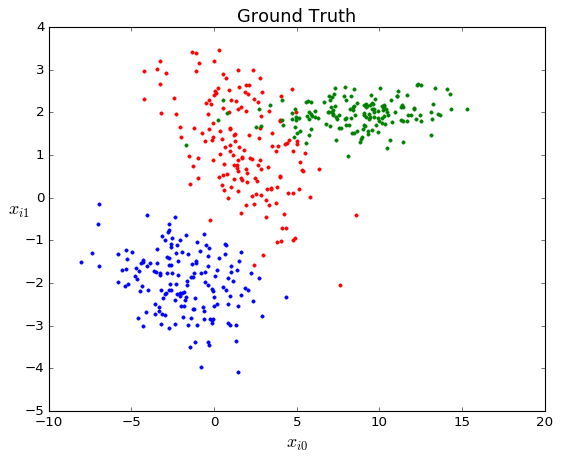

In [0]:
num_samples=160
data, labels, mu, sigma = get_samples(num_samples)
X, y = data.data.numpy(), np.array([0]*num_samples+[1]*num_samples+[2]*num_samples)
plot(data, mu.data, sigma.data, labels, figname='Evaluation_GT.png')

### k-means clustering on the generated data    


 ***Args:***   
     
*   ***init***:   *Method for initialization, e.g. ‘k-means++’, ‘random’ (default: "k-means++’")*     
* ***n_init***:   *Number of time the k-means algorithm will be run with different centroid seeds.  (default: 10)*          
* ***n_clusters***:   *The number of clusters to form as well as the number of centroids to generate.  (default: 3)*       

In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics

n_clusters = 3
n_init = 10
init = 'k-means++'                                                               # This initializes the centroids to be (generally) distant from each other,
                                                                                 # leading to provably better results than random initialization
k_means = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=1)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

### plot the result of k-means clustering  
![alt text](https://www.dropbox.com/s/obfb629holp8bof/Evaluation_kmeans.png?raw=1)

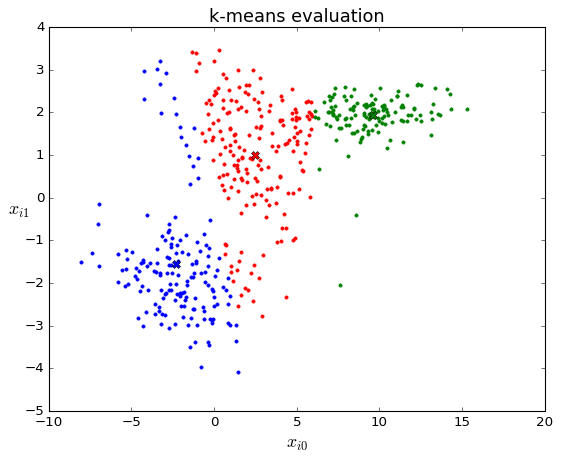

In [0]:
from itertools import cycle
colors = cycle('rgbcmykbrgcmykbrgcmykbrgcmyk')

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = k_means.labels_

plt.figure(facecolor='w')
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col+'.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, marker='X', markersize=8)

plt.xlabel(r"$x_{i0}$", fontsize=16)
plt.ylabel(r"$x_{i1}$", fontsize=16, rotation=0)
plt.title("k-means evaluation", fontsize=16)
# plt.savefig('Evaluation_kmeans.png')

### evaluation scores of k-means clustering    


*output:*   
======== internal metrics ========    
*Davies-Bouldin Score: 0.685*    
*Dunn Index of kmeans: 0.020*     
*Silhouette Coefficient: 0.502*   
======== external metrics ========      
*Adjusted Rand Index: 0.607*     
*Mutual Information Score: 0.647*      
*Cluster Purity: 0.852*

In [0]:
from utils import dunn_index, purity_score
from sklearn import metrics

# internal metrics:
print('======== internal metrics ========')
print("Davies-Bouldin Score: %0.3f"
     % metrics.davies_bouldin_score(X, k_means_labels))
print("Dunn Index of kmeans: %0.3f"
      % dunn_index(X, k_means_labels))
print("Silhouette Coefficient: %0.3f"     #  runs slow
      % metrics.silhouette_score(X, k_means_labels))


# external metrics:
print('======== external metrics ========')
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, k_means_labels))
print("Mutual Information Score: %0.3f"
      % metrics.mutual_info_score(y, k_means_labels))
print('Cluster Purity: %0.3f'
     % purity_score(y, k_means_labels))

======== internal metrics ========
Davies-Bouldin Score: 0.685
Dunn Index of kmeans: 0.020
Silhouette Coefficient: 0.502
======== external metrics ========
Adjusted Rand Index: 0.607
Mutual Information Score: 0.647
Cluster Purity: 0.852


###GMMs  clustering on the generated data      
***Args:***   
*   ***cov_type***:   *String(s) describing the type of covariance parameters to use. Must from: 'spherical', 'diag', 'tied', 'full'*      
*   ***max_iter***:   *The number of EM iterations to perform.  (default: 200)*       
* ***n_clusters***:   *The number of clusters to form as well as the number of centroids to generate.  (default: 3)*  


In [0]:
import matplotlib as mpl
def make_ellipses(gmm, fig):
    colors = ['red', 'green','blue']
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  # set the center as the mean of each mixture component.
                                  180 + angle, color=color)
        ell.set_facecolor('none')
        ax = fig.gca()
        ax.add_artist(ell)
        
#     ax.set_xlim(-10, 20)
#     ax.set_ylim(-4, 5)

### plot the result of GMMs clustering  
![alt text](https://www.dropbox.com/s/lik1ifclla7j3ir/Evaluation_GMMs.png?raw=1)

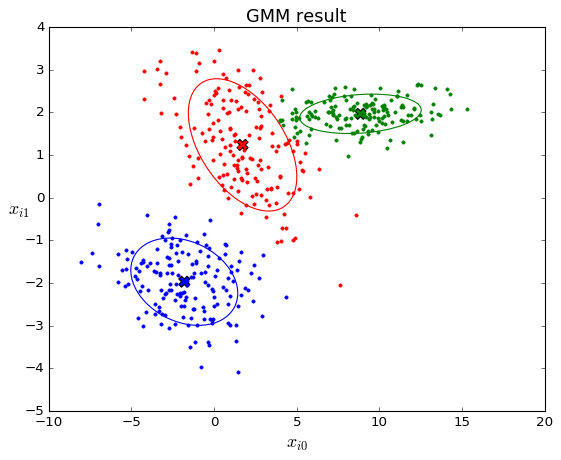

In [0]:
# from utils import draw_ellipses
from itertools import cycle
from sklearn.mixture import GaussianMixture


cov_type = 'full'
max_iter=200
n_clusters = 3  # pre-define the number of clusters


estimator = GaussianMixture(n_components=n_clusters,             
                   covariance_type=cov_type, max_iter=max_iter, random_state=1)
                  
estimator.fit(X) 
cluster_labels = estimator.predict(X)


fig = plt.figure(facecolor='w')
colors = cycle('rgbcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = cluster_labels == k
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
    
# plot the gaussian mixtures
make_ellipses(estimator, fig)



plt.scatter(estimator.means_[:,0], estimator.means_[:,1], 99, marker='X', c=['red', 'green','blue'])
plt.title("GMM result", fontsize=16)
plt.xlabel(r"$x_{i0}$", fontsize=16)
plt.ylabel(r"$x_{i1}$", fontsize=16, rotation=0)
plt.savefig('Evaluation_GMMs.png')

### evaluation scores of GMMs clustering    


*output:*   
======== internal metrics ========    
*Davies-Bouldin Score: 0.785*    
*Dunn Index: 0.009*     
*Silhouette Coefficient: 0.456*   
======== external metrics ========      
*Adjusted Rand Index: 0.910*     
*Mutual Information Score: 0.962*      
*Cluster Purity: 0.969*   
 

In [0]:
from utils import dunn_index, purity_score
from sklearn import metrics

# internal metrics:
print('======== internal metrics ========')
print("Davies-Bouldin Score: %0.3f"
     % metrics.davies_bouldin_score(X, cluster_labels))
print("Dunn Index: %0.3f"
      % dunn_index(X, cluster_labels))
print("Silhouette Coefficient: %0.3f"     #  runs slow
      % metrics.silhouette_score(X, cluster_labels))


# external metrics:
print('======== external metrics ========')
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, cluster_labels))
print("Mutual Information Score: %0.3f"
      % metrics.mutual_info_score(y, cluster_labels))
print('Cluster Purity: %0.3f'
     % purity_score(y, cluster_labels))

======== internal metrics ========
Davies-Bouldin Score: 0.785
Dunn Index: 0.009
Silhouette Coefficient: 0.456
======== external metrics ========
Adjusted Rand Index: 0.910
Mutual Information Score: 0.962
Cluster Purity: 0.969


# Section 3 Image Segmentation as Clustering Problems

In [0]:
"""import common python libraries"""
import cv2
import numpy as np
import random
import pandas as pd
import io
from google.colab import files

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('classic')

# Fix random seeds so that the results will be reproducible
np.random.seed(1)
random.seed(1)

!pip install pyro-ppl 
!wget "https://www.dropbox.com/s/rvyop27k2fago0u/utils.py"
# from pyro.optim import Adam
from utils import plot

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

###Load sample images 



In [0]:
!curl -L "https://www.dropbox.com/sh/c5hf6811okattot/AADH9qbpDAvndAZeEl1bGg1oa?dl=1" > "sample_images.zip"
!unzip "sample_images.zip"
!rm -f "sample_images.zip"

###Take a look at the sample images 

In [0]:
import skimage

Img_files = ['shapes_simp.png', 'statue.png']
 
plt.figure(figsize = (16, 8), facecolor='w')
for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
#     plt.setp(ax, xticks=(), yticks=())
    img = skimage.io.imread(Img_files[i])   
    plt.imshow(img)
    plt.title(Img_files[i], fontsize=12)

### Take a look at the CIELAB color space   

Seen from the above segmentation results, the shadow region is clustered as one of the clusters.  We can eliminate the impact of the shadow by separating the Luminance channel from the Chrominance channels in the"Lab"  space.



###  3D scatter plot for the statue image in RGB

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

im = cv2.imread('statue.png')
##OpenCV by default reads images in BGR format.
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(im)
fig = plt.figure(facecolor='w')
axis = fig.add_subplot(1, 1, 1, projection="3d")
# sample by fraction of 0.1
pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))[::50,:]
norm = colors.Normalize(vmin=0.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten()[::50], g.flatten()[::50], b.flatten()[::50], facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.view_init(55, -120)


###  3D scatter plot for the statue image in Lab

In [0]:
Lab_im = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(Lab_im)
fig = plt.figure(facecolor='w')
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(a.flatten()[::50], b.flatten()[::50], L.flatten()[::50],  facecolors=pixel_colors, marker=".")

axis.set_xlabel("a*")
axis.set_ylabel("b*")
axis.set_zlabel("L*")
axis.view_init(55, -120)

### split the L*, a*, b* channel




In [0]:
from utils import plot_imgs

img_lab = skimage.color.rgb2lab(img)
# plots for L*, a*, b* channels  
plot_imgs(img_arrays=[img_lab[:,:,0], img_lab[:,:,1], img_lab[:,:,2]], img_titles=['L* channel', 'a* channel', 'b* channel'])

##  k-means segmentation

###clustering images using k-means    
***Args:***

* ***Img_file***:  *flag to toggle sample  images, e.g. 'statue.png', 'shapes_simp.png'* 
*   ***init***:   *Method for initialization, e.g. ‘k-means++’, ‘random’ (default: "k-means++")*     
* ***n_init***:   *Number of time the k-means algorithm will be run with different centroid seeds.  (default: 10)*          
* ***n_clusters***:   *The number of clusters to form as well as the number of centroids to generate.*   
* ***color_space***:   *The color space used in the preprocessing stage. e.g. 'RGB', 'Lab', 'ab' (default: RGB)*   

In [0]:
from sklearn import cluster
import skimage

# try 'statue.png' and observe the results.
Img_file = 'shapes_simp.png'
img = skimage.io.imread(Img_file)

init = 'k-means++'  
n_clusters = 3
n_init = 10
color_space = 'RGB'

### show the k-means clustering results

In [0]:
from utils import plot_imgs

if color_space == 'RGB':
    # convert the image array into a two-dimensional array with the length being
    # the total number of pixels and width (3) as the RGB values.  
    image_2d = img.reshape(-1, 3)/np.max(img)
    
elif color_space == 'Lab':
    img_lab = skimage.color.rgb2lab(img)
    image_2d = img_lab.reshape(-1, 3)
    
elif color_space == 'ab':
    # separate the L(luminance channel) from a*, b* channels
    img_lab = skimage.color.rgb2lab(img)[:,:,1:3]
    image_2d = img_lab.reshape(-1, 2)
else:
    raise ValueError('please convert to other color spaces or the value should be selected form \'RGB\', \'Lab\' or \'ab\'')

# k-means clustering    
kmeans_cluster = cluster.KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=1)
kmeans_cluster.fit(image_2d)

# self-defined rgb centroids for showing the segmentation result
cluster_display_centers = np.array([ [95,158,160],
                                    [135,206,250],
                                    [255,250,240]])   
# labels for each pixel as 0 <= c < n_clusters
cluster_labels = kmeans_cluster.labels_               

# preparing the ground truth image
# load the ground truth labels of the selected image
img_label = skimage.io.imread(Img_file.split('.')[0]+'_gt.png')
# encode the raw color values into labels as 0 <= c < n_clusters
for i, c in enumerate(np.unique(img_label)):
    img_label[img_label==c] = i
# broadcast the true labels into self-defined rgb values for plots
img_gt = cluster_display_centers[img_label.reshape(-1,1)].reshape(img.shape)


# preparing the clustering result as the segmentation image
seg_display_centers = cluster_display_centers.copy()
# change the color scheme to align with the ground truth image
if Img_file == 'shapes_simp.png':
    # map 0 -> 2, 1 -> 0, and 2 -> 1 
    seg_display_centers[[2, 0, 1]] = seg_display_centers[[0, 1, 2]]
elif Img_file == 'statue.png':
    if color_space == 'RGB': # map 0 -> 0, 1 -> 2, and 2 -> 1 
      seg_display_centers[[0, 2, 1]] = seg_display_centers[[0, 1, 2]]
    elif color_space == 'ab':
      seg_display_centers[[2, 1, 0]] = seg_display_centers[[0, 1, 2]]
img_seg = seg_display_centers[cluster_labels].reshape(img.shape)
# plot the segmentation result and the original image
plot_imgs(img_arrays=[img_seg, img_gt], img_titles=['k-means segmentation ('+ color_space+')', 'Ground Truth'])
# plt.savefig('k-means_segmentation_'+color_space+'_'+Img_file)

###evaluation of the k-means  segmentation result    


*output:*   

**shape image (RGB color space) :**    
======== internal metrics ========      
*Davies-Bouldin Score: 0.000*    
<!-- *Dunn Index: 14416927.170*      -->
*Silhouette Coefficient: 1.000*   
======== external metrics ========         
*Adjusted Rand Index: 1.000*     
*Mutual Information Score: 1.034*      
*Cluster Purity: 1.000*   


**statue image (ab color space) :**    
======== external metrics ========   
Adjusted Rand Index: 0.872   
Mutual Information Score: 0.915    
Cluster Purity: 0.955


In [0]:
from utils import dunn_index_fast, purity_score, dunn_index
from sklearn import metrics


if Img_file == 'shapes_simp.png':
# internal metrics are computationaly expensive for statue image
    print('======== internal metrics ========')
    print("Davies-Bouldin Score: %0.5f"
         % metrics.davies_bouldin_score(image_2d, cluster_labels))
    # approaches inf when converting to lab space
    #print("Dunn Index: %0.3f"
    #      % dunn_index_fast(image_2d, cluster_labels))
    print("Silhouette Coefficient: %0.3f"     
          % metrics.silhouette_score(image_2d, cluster_labels))

# external metrics:
print('======== external metrics ========')
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(img_label.flatten(), cluster_labels))
print("Mutual Information Score: %0.3f"
      % metrics.mutual_info_score(img_label.flatten(), cluster_labels))
print('Cluster Purity: %0.3f'
     % purity_score(img_label.flatten(), cluster_labels))

## Mean-shift  segmentation

### mean-shift segmentation   
 ***Args:***   
*  ***Img_file***: *flag to toggle sample images, e.g. 'statue.png', 'shapes_simp.png'*
*   ***bandwidth***:   *Bandwidth used in the RBF kernel.*          
*   ***bin_seeding***:   *If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points*   
***color_space***: *The color space used in the preprocessing stage. e.g. 'RGB', 'Lab', 'ab' (default: RGB)*

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import skimage

# try 'statue.png' and observe the results.
Img_file = 'statue.png'
img = skimage.io.imread(Img_file)

color_space = 'ab'
bin_seeding=True
# modify the bandwidth and observe the change 
# in the number of estimate clusters
bandwidth = {'shapes_simp.png': {'RGB': 23.5, 'Lab': 23.5, 'ab': 3.5},
            'statue.png': {'RGB': 50.5, 'Lab': 14.5, 'ab':  5.5}
            }   # try add your own image files and their estimated bandwidths

### show the mean-shift clustering results

In [0]:
from utils import plot_imgs

if color_space == 'RGB':  
    image_2d = img.reshape(-1, 3)
    
elif color_space == 'Lab':
    img_lab = skimage.color.rgb2lab(img)
    image_2d = img_lab.reshape(-1, 3)
    
elif color_space == 'ab':
    # separate the L(luminance channel) from a*, b* channels
    img_lab = skimage.color.rgb2lab(img)[:,:,1:3]
    image_2d = img_lab.reshape(-1, 2)
else:
    raise ValueError('please convert to other color spaces or the value should be selected form \'RGB\', \'Lab\' or \'ab\'')

# Compute clustering with MeanShift
ms = MeanShift(bandwidth=bandwidth[Img_file][color_space], bin_seeding=bin_seeding)  
ms.fit(image_2d)

cluster_labels = ms.labels_
n_clusters_ = len(np.unique(cluster_labels))
print('estimated total number of clusters: '+ str(n_clusters_))


# self-defined rgb centroids for showing the segmentation result
cluster_display_centers = np.array([ [95,158,160],
                                    [135,206,250],
                                    [255,250,240]]) 

# preparing the ground truth image
# load the ground truth labels of the selected image
img_label = skimage.io.imread(Img_file.split('.')[0]+'_gt.png')
# encode the raw color values into labels as 0 <= c < n_clusters
for i, c in enumerate(np.unique(img_label)):
    img_label[img_label==c] = i
# broadcast the true labels into self-defined rgb values for plots
img_gt = cluster_display_centers[img_label.reshape(-1,1)].reshape(img.shape)


# preparing the clustering result as the segmentation image
seg_display_centers = cluster_display_centers.copy()
# change the color scheme to align with the ground truth image
if Img_file == 'shapes_simp.png':
    # map 0 -> 2, 1 -> 1, and 2 -> 0 
    seg_display_centers[[2, 1, 0]] = seg_display_centers[[0, 1, 2]]
elif Img_file == 'statue.png':
    if color_space == 'Lab' or color_space == 'RGB': # map 0 -> 2, 1 -> 0, and 2 -> 1 
      seg_display_centers[[2, 0, 1]] = seg_display_centers[[0, 1, 2]]
    elif color_space == 'ab':
      seg_display_centers[[0, 1, 2]] = seg_display_centers[[0, 1, 2]]

img_seg = seg_display_centers[cluster_labels].reshape(img.shape)
# plot the segmentation result and the original image
plot_imgs(img_arrays=[img_seg, img_gt], img_titles=['mean-shift segmentation ('+ color_space+')', 'Ground Truth'])
plt.savefig('mean-shift_segmentation_'+color_space+'_'+Img_file)

### evaluation for the mean-shift segmentation result  
*output:*   
**shape image (RGB color space) :**     
======== external metrics ========      
*Adjusted Rand Index: 1.000*     
*Mutual Information Score: 1.034*      
*Cluster Purity: 1.000*   


**statue image (ab color space) :**     
======== external metrics ========      
*Adjusted Rand Index: 0.853*     
*Mutual Information Score: 0.901*      
*Cluster Purity: 0.948* 

In [0]:
from utils import purity_score
from sklearn import metrics


# external metrics:
print('======== external metrics ========')
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(img_label.flatten(), cluster_labels))
print("Mutual Information Score: %0.3f"
      % metrics.mutual_info_score(img_label.flatten(), cluster_labels))
print('Cluster Purity: %0.3f'
     % purity_score(img_label.flatten(), cluster_labels))

##Spectral clustering segmentation      

###spectral clustering segmentation 
 ***Args:***   
*  ***Img_file***: *flag to toggle sample images, e.g. 'statue.png', 'shapes_simp.png'*
*   ***n_clusters***:   *Number of clusters to extract.*          
*   ***assign_labels***:   *The strategy to use to assign labels in the embedding space. e.g. ‘kmeans’, ‘discretize’, The "kmeans" strategy can match finer details of the data, but it can be more unstable. "Discretize" strategy is 100% reproducible, but it tends to create parcels of fairly even and geometrical shape.*      

*   ***betas***:   *The smaller beta is, the more independent the segmentation is of the image.*       
*  ***downsample_flag***: *The flag to downsample the image prior to clustering.*   
***downsample_factor***: *The downsample factor (default: 0.1)*    
* ***color_space***: *The color space used in the preprocessing stage. e.g. 'RGB', 'Lab', 'ab', 'b' (default: RGB)*

In [0]:
import skimage

# try 'statue.png' and observe the results.
Img_file = 'statue.png'
img = skimage.io.imread(Img_file)

n_clusters = 3  # pre-define the number of clusters
assign_labels = 'kmeans'
# modify this beta coefficient and observe the result
# b* channel is specific for the statue image to save computation and yield okay result
betas = {'shapes_simp.png': {'RGB': 4.9, 'Lab': 7.9, 'ab': 10.5},
         'statue.png': {'b*':  9.3} }  

if Img_file == 'statue.png':
  color_space = 'b*'
else:
  color_space = 'ab'
# downsample the image prior to clustering for computational efficiency
downsample_flag = False
downsample_factor = 0.1
beta = betas[Img_file][color_space]

In [0]:
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from utils import plot_imgs

if img.shape[0]*img.shape[1] > 3200:
    # downsample the image to save computation
    img = cv2.resize(img, (0,0), fx=downsample_factor, fy=downsample_factor, interpolation=cv2.INTER_NEAREST)
    downsample_flag = True
    
if color_space == 'RGB':  
    img_converted = img.copy()
    
elif color_space == 'Lab':
    # clustering in Lab space will take much time
    img_converted = skimage.color.rgb2lab(img)
    
    
elif color_space == 'ab':
    # separate the L(luminance channel) from a*, b* channels
    img_converted = skimage.color.rgb2lab(img)[:,:,1:3]
    
elif color_space == 'b*':
    img_converted = skimage.color.rgb2lab(img)[:,:,2]
    img_converted = img_converted.reshape(img_converted.shape[0], img_converted.shape[1], 1)
else:
    raise ValueError('please convert to other color spaces or the value should be selected form \'RGB\', \'Lab\' or \'ab\'')


# Convert the image into a graph with the value of the gradient on the edges.
graph = image.img_to_graph(img_converted)
# Construct the affinity matrix by taking an exponential decreasing function 
graph.data = np.exp(-beta * graph.data / graph.data.std()) + 1e-6  

cluster_labels = spectral_clustering(affinity=graph, n_clusters=n_clusters,
                                 assign_labels=assign_labels, random_state=1)


### show the spectral clustering results

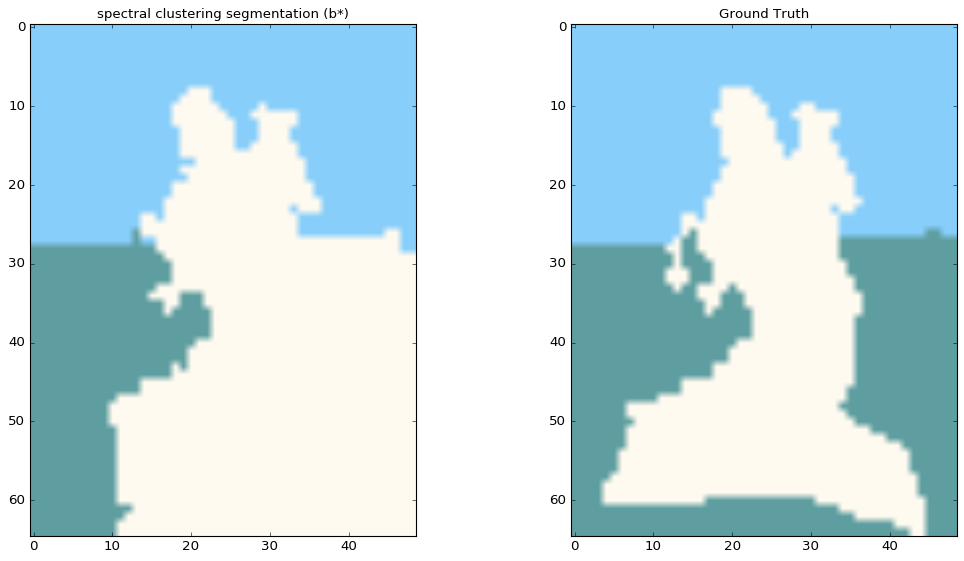

In [0]:


cluster_display_centers = np.array([ [95,158,160],
                                    [135,206,250],
                                    [255,250,240]])   # self-defined rgb centroids, only for displaying the segmentation result

 
# preparing the ground truth image
# load the ground truth labels of the selected image
img_label = skimage.io.imread(Img_file.split('.')[0]+'_gt.png')
if downsample_flag:
  # also downsample the labeled image for evaluation
  img_label = cv2.resize(img_label, (0,0), fx=downsample_factor, fy=downsample_factor, interpolation=cv2.INTER_NEAREST)    # important to use nearest interpolation

# encode the raw color values into labels as 0 <= c < n_clusters
for i, c in enumerate(np.unique(img_label)):
    img_label[img_label==c] = i
# broadcast the true labels into self-defined rgb values for plots
img_gt = cluster_display_centers[img_label.reshape(-1,1)].reshape(img.shape)


# change the color scheme to align the ground truth
seg_display_centers = cluster_display_centers.copy()

if Img_file == 'shapes_simp.png':
    if color_space == 'Lab' or color_space == 'ab':
      seg_display_centers[[0, 2, 1]] = seg_display_centers[[0, 1, 2]]
elif Img_file == 'statue.png':
    seg_display_centers[[2, 0, 1]] = seg_display_centers[[0, 1, 2]]

      

img_seg = seg_display_centers[cluster_labels[::img_converted.shape[-1]].reshape(-1,1)].reshape(img.shape)
# plot the segmentation result and the original image
plot_imgs(img_arrays=[img_seg, img_gt], img_titles=['spectral clustering segmentation ('+ color_space+')', 'Ground Truth'])
plt.savefig('spectral_clustering_segmentation_'+color_space+'_'+Img_file)


### evaluation scores of spectral clustering segmentation       


*output:*   

**shape image (RGB color space) :**     
======== external metrics ========      
*Adjusted Rand Index: 1.000*     
*Mutual Information Score: 1.034*      
*Cluster Purity: 1.000*   


**statue image (b* channel) :**  

======== external metrics ========      
*Adjusted Rand Index: 0.595*     
*Mutual Information Score: 0.680*      
*Cluster Purity: 0.806*   



In [0]:
from utils import dunn_index_fast, purity_score, dunn_index
from sklearn import metrics

img_2d = img_converted.reshape(-1, img_converted.shape[-1]) 

# external metrics:
print('======== external metrics ========')
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(img_label.flatten(), cluster_labels))
print("Mutual Information Score: %0.3f"
      % metrics.mutual_info_score(img_label.flatten(), cluster_labels))
print('Cluster Purity: %0.3f'
     % purity_score(img_label.flatten(), cluster_labels))

##GMMs image segmentation   


### take a look at the plot the 2D scatter plot of a *, b * channels of the statue image

Text(0.5, 1.0, 'a*, b* channel of the statue image')

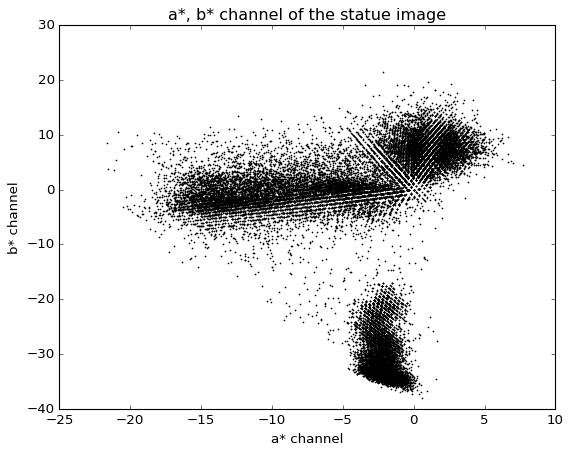

In [0]:
import skimage
# try 'shapes_simp.png', it should be 3 very dense "dots"
img = skimage.io.imread('statue.png')
img_lab = skimage.color.rgb2lab(img)
plt.figure(facecolor='w')
# sample the a*, b* channels by fraction of 0.1 for plots
plt.plot(img_lab.reshape(-1, 3)[::10,1], img_lab.reshape(-1, 3)[::10,2],  'k.', markersize=2)
plt.xlabel('a* channel')
plt.ylabel('b* channel')
plt.title('a*, b* channel of the statue image')

### plot the 2D scatter plot of GMMs result on the a *, b * channels of the  statue image   
 ***Args:***   


*   ***cov_type***:   *String(s) describing the type of covariance parameters to use. Must from: 'spherical', 'diag', 'tied', 'full'*      
*   ***max_iter***:   *The number of EM iterations to perform.  (default: 100)*       

* ***n_clusters***: *The number of mixture components.*

Text(0, 0.5, 'b* channel')

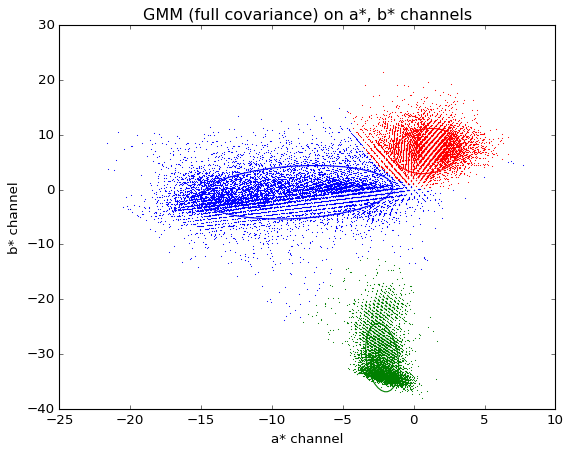

In [0]:
from itertools import cycle
from sklearn.mixture import GaussianMixture
from utils import draw_ellipses

# data
img_ab = img_lab[:,:,1:3]
image_2d = img_ab.reshape(-1, 2)[::10,:]


cov_type = 'full'    # try 'spherical', 'diag', 'tied'
max_iter=200
n_clusters = 3  # pre-define the number of clusters


estimator = GaussianMixture(n_components=n_clusters,             
                   covariance_type=cov_type, max_iter=max_iter, random_state=1)
                  

estimator.fit(image_2d) 
cluster_labels = estimator.predict(image_2d)


# plot the clustering result on a, b channels
fig = plt.figure(facecolor='w')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = cluster_labels == k
    plt.plot(image_2d[my_members, 0], image_2d[my_members, 1], col + '.', markersize=1)
    
    
# plot the gaussian mixtures
draw_ellipses(estimator, fig)


plt.title('GMM ('+cov_type+" covariance) on a*, b* channels")
plt.xlabel('a* channel')
plt.ylabel('b* channel')

###  Image segmentation using GMMs clustering

 
 ***Args:***   

*  ***Img_file***: *flag to toggle sample images, e.g. 'statue.png', 'shapes_simp.png'*
*   ***cov_type***:   *The type of covariance parameters to use. Must from: 'spherical', 'diag', 'tied', 'full'*      
*   ***max_iter***:   *The number of EM iterations to perform.  (default: 100)*       

* ***n_clusters***: *The number of mixture components.*  
* ***color_space***: *The color space used in the preprocessing stage. e.g. 'RGB', 'Lab', 'ab', 'b' (default: RGB)*

In [0]:
import skimage

# try 'statue.png' and observe the results.
Img_file = 'statue.png'
img = skimage.io.imread(Img_file)


cov_type = 'full'   # try 'spherical', 'diag', 'tied'
max_iter=200
n_clusters = 3  # pre-define the number of clusters
color_space = 'ab'

### show the GMMs clustering results

In [0]:
from sklearn.mixture import GaussianMixture
from utils import plot_imgs

if color_space == 'RGB':  
    img_2d = img.reshape(-1, 3)
    
elif color_space == 'Lab':
    # clustering in Lab space will take much time
    img_lab = skimage.color.rgb2lab(img)
    img_2d = img_lab.reshape(-1, 3)
    
elif color_space == 'ab':
    # separate the L(luminance channel) from a*, b* channels
    img_ab = skimage.color.rgb2lab(img)[:,:,1:3]
    img_2d = img_ab.reshape(-1, 2)
else:
    raise ValueError('please convert to other color spaces or the value should be selected form \'RGB\', \'Lab\' or \'ab\'')

    
# gaussian mixture models clustering
estimator = GaussianMixture(n_components=n_clusters,             
                   covariance_type=cov_type, max_iter=max_iter, random_state=1)

estimator.fit(img_2d) 
cluster_labels = estimator.predict(img_2d)
n_clusters_ = len(np.unique(cluster_labels))
print('estimated total number of clusters: '+ str(n_clusters_))



cluster_display_centers = np.array([ [95,158,160],
                                    [135,206,250],
                                    [255,250,240]])   # self-defined rgb centroids, only for displaying the segmentation result

# preparing the ground truth image
# load the ground truth labels of the selected image
img_label = skimage.io.imread(Img_file.split('.')[0]+'_gt.png')
# encode the raw color values into labels as 0 <= c < n_clusters
for i, c in enumerate(np.unique(img_label)):
    img_label[img_label==c] = i
# broadcast the true labels into self-defined rgb values for plots
img_gt = cluster_display_centers[img_label.reshape(-1,1)].reshape(img.shape)

# change the color scheme to align the ground truth
seg_display_centers = cluster_display_centers.copy()
if Img_file == 'shapes_simp.png':
    seg_display_centers[[2, 0, 1]] = seg_display_centers[[0, 1, 2]]

elif Img_file == 'statue.png':
    if color_space == 'ab':
        seg_display_centers[[2, 1, 0]] = seg_display_centers[[0, 1, 2]]

img_seg = seg_display_centers[cluster_labels.reshape(-1,1)].reshape(img.shape)
# plot the segmentation result and the original image
plot_imgs(img_arrays=[img_seg, img_gt], img_titles=['Gaussian Mixture Models segmentation ('+ color_space+')', 'Ground Truth'])
# plt.savefig('GMMs_segmentation_'+color_space+'_'+Img_file)

### evaluation scores of GMMs segmentation       


**shape image (RGB channels) :**
*output:*   
======== external metrics ========      
*Adjusted Rand Index: 1.000*     
*Mutual Information Score: 1.034*      
*Cluster Purity: 1.000*     

**statue image (a*, b* channels) :**
======== external metrics ========      
*Adjusted Rand Index: 0.874*     
*Mutual Information Score: 0.921*      
*Cluster Purity: 0.956*  

In [0]:
from utils import dunn_index_fast, purity_score, dunn_index
from sklearn import metrics



# external metrics:
print('======== external metrics ========')
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(img_label.flatten(), cluster_labels))
print("Mutual Information Score: %0.3f"
      % metrics.mutual_info_score(img_label.flatten(), cluster_labels))
print('Cluster Purity: %0.3f'
     % purity_score(img_label.flatten(), cluster_labels))